## Baruch Data Science Challenge 2021
### Group 17 
Alexandra Eberts \
Elaine Zhang \
Eric Sedaghat \
Shan Chen

## Libraries Used

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from google.colab import  drive 

## Import Data - Test and Training Data

In [ ]:
test_url = 'https://raw.githubusercontent.com/alexandraeberts/datachallenge9/main/test.csv'
train_url = 'https://raw.githubusercontent.com/alexandraeberts/datachallenge9/main/train.csv'

In [ ]:
pd.options.mode.chained_assignment = None  # default='warn' 
df_test = pd.read_table(test_url, sep = ",")
df_test

,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,discharging_rate_lag3,discharging_rate_lag7,charge_cycle_time_below_12,avg_time_charging_lag4,avg_time_discharging_lag4,avg_time_charging_lag5,avg_time_discharging_lag5,avg_time_charging_lag6,avg_time_discharging_lag6,avg_time_charging_lag8,avg_time_discharging_lag8,avg_time_charging_lag9,avg_time_discharging_lag9,avg_time_charging_lag10,avg_time_discharging_lag10,avg_time_charging_lag11,avg_time_discharging_lag11,avg_time_charging_lag12,avg_time_discharging_lag12,avg_time_charging_lag13,avg_time_discharging_lag13,avg_time_charging_lag14,avg_time_discharging_lag14,discharging_rate_lag4,discharging_rate_lag5,discharging_rate_lag6,discharging_rate_lag8,charging_rate_lag4,charging_rate_lag5,charging_rate_lag6,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,LastRecord,Date Deployed
0,42979,35.56,4.31,5.07,4.60,-0.033333,0.040000,66.29,3.77,4.07,3.83,-0.240000,-0.033333,True,4.58,4.10,5.11,4.31,4.66,3.67,6.33,5.78,5.91,4.94,5.06,3.37,31.21,45.77,46.03,72.74,33.74,57.85,20.67,28.73,-2.240000,0.026667,-0.033333,0.043333,-0.176667,-0.010000,-0.006667,77.960000,77.680000,47.840000,3.640000,346.301200,345.379600,17.481600,27.721600,4159.000000,12.437500,45.203200,4/1/21,9/8/19
1,14911,31.26,4.76,27.40,29.60,-0.076667,-0.060000,49.57,3.63,44.06,40.74,-0.670000,-0.033333,False,4.75,4.10,37.44,71.56,5.07,4.64,4.70,3.67,21.24,38.26,5.25,4.59,5.31,4.27,4.47,4.07,4.71,17.73,5.35,5.51,0.120000,0.056667,-1.190000,1.453333,-0.233333,-0.043333,-0.233333,81.260870,81.260870,24.173913,2.826087,356.218261,357.305652,17.479130,27.650435,4163.608696,34.818182,45.129565,4/1/21,9/13/19
2,48386,30.08,5.07,4.76,4.74,0.013333,-0.016667,52.96,5.16,4.05,4.22,0.000000,0.010000,True,5.09,5.04,13.50,21.91,4.48,4.20,5.02,4.14,4.77,3.48,5.18,5.80,29.12,48.01,43.60,80.25,4.82,3.96,5.21,4.37,0.306667,0.096667,0.020000,-1.280000,0.243333,0.010000,0.013333,109.200000,109.133333,10.333333,1.266667,368.532667,366.844667,11.361333,16.739333,4176.133333,15.888889,28.100667,4/1/21,10/10/19
3,18822,33.31,32.79,5.09,4.96,0.000000,0.003333,49.26,68.54,5.83,4.78,0.003333,-0.026667,True,4.56,3.92,5.10,5.81,35.69,56.90,4.91,4.22,5.05,4.75,35.47,58.31,29.44,42.88,50.04,88.48,4.88,3.62,4.52,4.01,0.946667,0.460000,0.000000,0.073333,0.536667,-0.030000,0.023333,90.875000,91.000000,16.625000,0.937500,352.899375,352.595000,17.168750,27.460625,4159.875000,12.750000,44.629375,4/1/21,10/13/19
4,49810,4.44,30.03,5.57,5.02,-0.200000,-0.030000,4.16,54.80,4.52,4.62,-4.483333,-0.423333,False,4.84,3.43,6.07,5.04,45.39,77.12,26.64,54.73,35.01,54.38,4.94,3.38,5.84,4.61,4.87,3.36,31.75,59.88,25.98,41.24,0.003333,-6.300000,0.020000,-0.490000,0.010000,0.926667,0.013333,81.560000,81.480000,1.000000,1.200000,363.912800,365.208400,14.860000,23.980800,4168.400000,7.500000,38.840800,4/1/21,10/19/19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,23329,30.25,4.75,45.83,27.42,-0.060000,0.046667,41.55,3.68,76.77,47.65,0.856667,-0.850000,False,40.65,71.91,5.11,4.79,5.00,3.33,4.59,3.71,32.44,59.65,51.04,85.13,4.66,4.17,38.94,69.66,47.61,80.58,4.85,4.00,0.613333,-0.040000,-1.206667,0.203333,-0.100000,0.023333,0.256667,69.722222,69.611111,0.722222,0.944444,340.913889,338.305556,24.527222,40.246667,4151.055556,22.444444,64.773889,4/1/21,10/17/19
4496,35263,5.29,4.57,36.77,5.38,0.623333,-1.173333,6.74,3.78,69.65,4.50,-0.563333,2.913333,False,36.69,72.59,4.62,3.76,30.55,43.62,4.76,4.30,5.41,4.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.040000,-0.023333,-0

In [ ]:
df_test.columns

Index(['deviceid', 'avg_time_charging_lag1', 'avg_time_charging_lag2',
       'avg_time_charging_lag3', 'avg_time_charging_lag7',
       'charging_rate_lag3', 'charging_rate_lag7', 'avg_time_discharging_lag1',
       'avg_time_discharging_lag2', 'avg_time_discharging_lag3',
       'avg_time_discharging_lag7', 'discharging_rate_lag3',
       'discharging_rate_lag7', 'charge_cycle_time_below_12',
       'avg_time_charging_lag4', 'avg_time_discharging_lag4',
       'avg_time_charging_lag5', 'avg_time_discharging_lag5',
       'avg_time_charging_lag6', 'avg_time_discharging_lag6',
       'avg_time_charging_lag8', 'avg_time_discharging_lag8',
       'avg_time_charging_lag9', 'avg_time_discharging_lag9',
       'avg_time_charging_lag10', 'avg_time_discharging_lag10',
       'avg_time_charging_lag11', 'avg_time_discharging_lag11',
       'avg_time_charging_lag12', 'avg_time_discharging_lag12',
       'avg_time_charging_lag13', 'avg_time_discharging_lag13',
       'avg_time_charging_lag14', 'a

In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'
df_train = pd.read_table(train_url, sep = ",")
df_train

,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,discharging_rate_lag3,discharging_rate_lag7,fail_7,charge_cycle_time_below_12,avg_time_charging_lag4,avg_time_discharging_lag4,avg_time_charging_lag5,avg_time_discharging_lag5,avg_time_charging_lag6,avg_time_discharging_lag6,avg_time_charging_lag8,avg_time_discharging_lag8,avg_time_charging_lag9,avg_time_discharging_lag9,avg_time_charging_lag10,avg_time_discharging_lag10,avg_time_charging_lag11,avg_time_discharging_lag11,avg_time_charging_lag12,avg_time_discharging_lag12,avg_time_charging_lag13,avg_time_discharging_lag13,avg_time_charging_lag14,avg_time_discharging_lag14,discharging_rate_lag4,discharging_rate_lag5,discharging_rate_lag6,discharging_rate_lag8,charging_rate_lag4,charging_rate_lag5,charging_rate_lag6,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,LastRecord,Date Deployed
0,28647,5.12,41.11,6.56,25.39,0.086667,-0.006667,4.37,91.70,15.70,39.12,-1.163333,0.033333,0,False,4.99,5.85,24.35,31.02,43.42,79.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.360000,1.573333,0.816667,-0.173333,-0.070000,-1.603333,-0.166667,50.250000,49.750000,49.000000,2.375000,377.080000,367.428750,21.696250,39.005000,4174.875000,14.200000,60.701250,4/1/21,10/6/19
1,36175,36.60,5.16,6.23,6.96,0.136667,-1.296667,62.67,6.53,6.16,8.25,-0.066667,-2.653333,0,False,13.64,20.37,5.65,4.77,19.41,24.33,35.92,59.38,4.49,4.12,44.18,72.46,27.45,49.02,10.89,18.93,21.39,35.90,NaN,NaN,-4.593333,0.450000,-3.063333,-0.103333,0.216667,0.000000,-1.010000,56.285714,56.000000,36.857143,1.000000,350.517857,350.309286,19.883571,32.213571,4161.000000,19.777778,52.097143,4/1/21,10/27/19
2,16107,5.51,5.04,4.52,5.96,-0.460000,-0.083333,5.13,5.65,4.14,14.02,-2.643333,0.686667,0,False,25.01,40.69,6.03,6.06,5.72,5.73,22.46,31.82,33.92,58.87,45.87,76.36,5.78,6.23,5.13,4.37,4.73,3.50,26.79,41.29,-0.050000,0.240000,0.000000,0.216667,-0.026667,0.000000,-0.013333,80.380952,80.333333,2.333333,4.095238,346.113333,343.409524,13.675238,20.471429,4152.238095,19.200000,34.146667,4/1/21,10/31/19
3,27362,4.66,39.85,35.76,40.69,0.076667,-0.006667,3.93,76.37,60.86,73.53,-0.166667,0.033333,0,False,4.71,3.74,4.74,3.73,24.01,52.99,5.09,5.32,4.45,4.22,22.14,30.51,4.39,4.15,4.71,3.82,13.27,18.62,4.97,4.16,0.013333,0.406667,-0.293333,-0.046667,-0.030000,0.460000,1.340000,91.736842,91.684211,10.789474,0.736842,356.184211,349.844737,16.306842,26.189474,4164.631579,23.625000,42.496316,4/1/21,10/1/19
4,19463,5.10,43.24,4.63,5.26,0.040000,-0.153333,4.69,71.44,3.80,6.29,0.066667,-1.030000,0,True,40.36,82.70,15.47,24.21,45.64,76.42,26.63,45.04,27.99,40.57,5.01,6.52,5.47,4.64,5.28,5.16,25.10,47.76,21.62,37.29,-0.353333,0.983333,-0.006667,-1.790000,0.016667,1.606667,0.013333,71.066667,70.733333,14.266667,1.133333,370.904000,367.730000,18.797333,30.812000,4169.800000,12.666667,49.609333,4/1/21,9/13/19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40495,16284,4.97,5.81,5.01,29.44,-0.083333,-0.033333,7.13,5.41,5.60,49.24,-0.160000,1.233333,1,True,4.84,9.54,5.86,6.01,13.19,20.12,5.12,4.90,36.37,70.65,4.71,3.80,5.01,5.91,33.39,74.08,34.80,53.14,4.58,4.01,0.236667,-0.050000,-0.026667,0.060000,-0.143333,0.086667,-0.013333,83.434783,82.956522,17.739130,2.782609,365.399130,354.915217,13.880435,23.077391,4162.913043,70.181818,36.957826,4/1/21,9/5/19
40496,49732,4.81,4.53,31.68,4.88,0.016667,-0.900000,4.71,3.99,49.68,3.42,0.533333,-0.180000,1,True,28.60,48.17,33.88,72.40,24.77,39.07,4.87,4.05,10.91,17.43,18.08,29.23,5.26,5.20,27.65,42.56,26.

In [ ]:
df_train.columns

Index(['deviceid', 'avg_time_charging_lag1', 'avg_time_charging_lag2',
       'avg_time_charging_lag3', 'avg_time_charging_lag7',
       'charging_rate_lag3', 'charging_rate_lag7', 'avg_time_discharging_lag1',
       'avg_time_discharging_lag2', 'avg_time_discharging_lag3',
       'avg_time_discharging_lag7', 'discharging_rate_lag3',
       'discharging_rate_lag7', 'fail_7', 'charge_cycle_time_below_12',
       'avg_time_charging_lag4', 'avg_time_discharging_lag4',
       'avg_time_charging_lag5', 'avg_time_discharging_lag5',
       'avg_time_charging_lag6', 'avg_time_discharging_lag6',
       'avg_time_charging_lag8', 'avg_time_discharging_lag8',
       'avg_time_charging_lag9', 'avg_time_discharging_lag9',
       'avg_time_charging_lag10', 'avg_time_discharging_lag10',
       'avg_time_charging_lag11', 'avg_time_discharging_lag11',
       'avg_time_charging_lag12', 'avg_time_discharging_lag12',
       'avg_time_charging_lag13', 'avg_time_discharging_lag13',
       'avg_time_charging_

## Data understanding
Data dictionary and quality check


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40500 entries, 0 to 40499
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   deviceid                     40500 non-null  int64  
 1   avg_time_charging_lag1       40500 non-null  float64
 2   avg_time_charging_lag2       40500 non-null  float64
 3   avg_time_charging_lag3       40500 non-null  float64
 4   avg_time_charging_lag7       40434 non-null  float64
 5   charging_rate_lag3           40500 non-null  float64
 6   charging_rate_lag7           40488 non-null  float64
 7   avg_time_discharging_lag1    40500 non-null  float64
 8   avg_time_discharging_lag2    40500 non-null  float64
 9   avg_time_discharging_lag3    40500 non-null  float64
 10  avg_time_discharging_lag7    40434 non-null  float64
 11  discharging_rate_lag3        40500 non-null  float64
 12  discharging_rate_lag7        40488 non-null  float64
 13  fail_7          

In [ ]:
df_train.isnull().sum()

deviceid                          0
avg_time_charging_lag1            0
avg_time_charging_lag2            0
avg_time_charging_lag3            0
avg_time_charging_lag7           66
charging_rate_lag3                0
charging_rate_lag7               12
avg_time_discharging_lag1         0
avg_time_discharging_lag2         0
avg_time_discharging_lag3         0
avg_time_discharging_lag7        66
discharging_rate_lag3             0
discharging_rate_lag7            12
fail_7                            0
charge_cycle_time_below_12        0
avg_time_charging_lag4            0
avg_time_discharging_lag4         0
avg_time_charging_lag5            7
avg_time_discharging_lag5         7
avg_time_charging_lag6           28
avg_time_discharging_lag6        28
avg_time_charging_lag8          162
avg_time_discharging_lag8       162
avg_time_charging_lag9          374
avg_time_discharging_lag9       374
avg_time_charging_lag10         797
avg_time_discharging_lag10      797
avg_time_charging_lag11     

In [ ]:
df_train[df_train['avg_time_discharging_lag14'].isnull()]

,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,discharging_rate_lag3,discharging_rate_lag7,fail_7,charge_cycle_time_below_12,avg_time_charging_lag4,avg_time_discharging_lag4,avg_time_charging_lag5,avg_time_discharging_lag5,avg_time_charging_lag6,avg_time_discharging_lag6,avg_time_charging_lag8,avg_time_discharging_lag8,avg_time_charging_lag9,avg_time_discharging_lag9,avg_time_charging_lag10,avg_time_discharging_lag10,avg_time_charging_lag11,avg_time_discharging_lag11,avg_time_charging_lag12,avg_time_discharging_lag12,avg_time_charging_lag13,avg_time_discharging_lag13,avg_time_charging_lag14,avg_time_discharging_lag14,discharging_rate_lag4,discharging_rate_lag5,discharging_rate_lag6,discharging_rate_lag8,charging_rate_lag4,charging_rate_lag5,charging_rate_lag6,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,LastRecord,Date Deployed
0,28647,5.12,41.11,6.56,25.39,0.086667,-0.006667,4.37,91.70,15.70,39.12,-1.163333,0.033333,0,False,4.99,5.85,24.35,31.02,43.42,79.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.360000,1.573333,0.816667,-0.173333,-0.070000,-1.603333,-0.166667,50.250000,49.750000,49.000000,2.375000,377.080000,367.428750,21.696250,39.005000,4174.875000,14.200000,60.701250,4/1/21,10/6/19
1,36175,36.60,5.16,6.23,6.96,0.136667,-1.296667,62.67,6.53,6.16,8.25,-0.066667,-2.653333,0,False,13.64,20.37,5.65,4.77,19.41,24.33,35.92,59.38,4.49,4.12,44.18,72.46,27.45,49.02,10.89,18.93,21.39,35.90,NaN,NaN,-4.593333,0.450000,-3.063333,-0.103333,0.216667,0.000000,-1.010000,56.285714,56.000000,36.857143,1.000000,350.517857,350.309286,19.883571,32.213571,4161.000000,19.777778,52.097143,4/1/21,10/27/19
7,5491,11.49,7.10,18.48,NaN,-0.650000,0.063333,18.21,10.88,23.40,NaN,-0.306667,-0.360000,0,False,5.33,5.06,46.45,90.76,10.26,16.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.380000,1.610000,-0.850000,-0.470000,-1.093333,0.653333,-0.423333,50.571429,50.428571,0.000000,0.428571,345.727143,342.172857,19.920000,34.582857,4171.285714,7.166667,54.502857,4/1/21,11/11/19
8,43953,35.88,46.05,5.43,4.77,0.830000,-2.486667,47.08,85.63,6.50,3.47,-1.293333,8.756667,0,False,36.49,63.68,27.15,47.65,5.12,6.64,4.83,3.50,5.27,4.29,5.03,4.19,4.61,3.61,4.72,4.24,44.36,87.35,NaN,NaN,-1.216667,1.110000,0.016667,-0.020000,3.546667,-0.346667,-0.133333,78.714286,78.571429,1.714286,0.785714,330.151429,332.997857,18.780714,30.125000,4137.428571,3.857143,48.905714,4/1/21,11/2/19
16,35863,40.50,4.98,51.18,47.73,-0.053333,-0.360000,77.55,4.47,91.32,87.36,0.023333,0.706667,0,True,27.99,44.24,5.64,4.82,40.68,73.21,4.53,4.26,4.76,4.54,46.64,73.17,4.89,3.57,NaN,NaN,NaN,NaN,NaN,NaN,0.243333,-0.006667,-0.623333,0.136667,2.213333,0.036667,0.530000,83.333333,82.916667,0.000000,1.250000,312.263333,300.710833,23.738333,39.410833,4127.583333,3.444444,63.149167,4/1/21,8/27/19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40470,24118,5.66,4.96,6.59,50.35,0.296667,-0.426667,4.62,4.71,4.52,95.81,-0.520000,1.236667,0,False,26.70,40.32,41.40,73.16,4.79,3.71,4.79,4.48,5.04,5.96,4.54,4.18,4.96,3.71,4.98,3.59,NaN,NaN,NaN,NaN,0.030000,0.196667,-0.043333,0.110000,-0.006667,0.026667,0.536667,93.000000,92.923077,29.769231,3.769231,360.187692,359.432308,14.227692,21.391538,4167.153846,74.125000,35.619231,4/1/21,10/25/19
40472,7747,5.17,5.05,4.79,5.21,-0.170000,-0.016667,4.84,5.72,3.50,3.80,0.350000,0.010000,0,False,5.50,6.52,4.76,4.25,32.09,59.91,4.79,4.21,4.73,4.50,4.38,4.18,18.90,30.05,NaN,NaN,NaN,NaN,NaN,NaN,0.076667,-0.460000,-0.263333,0.023333,0.01

In [ ]:
df_train[df_train['avg_time_discharging_lag14'].isnull()].value_counts('fail_7')

fail_7
0    5508
1    1160
dtype: int64

For training data, missing values are in 'charging_rate_lag6', 'charging_rate_lag7',  'discharging_rate_lag6', 'discharging_rate_lag7', 'discharging_rate_lag8', 
'avg_time_charging_lag5',
'avg_time_charging_lag6',
'avg_time_charging_lag7',
'avg_time_charging_lag8',
'avg_time_charging_lag9', 'avg_time_charging_lag10',
'avg_time_charging_lag11', 
'avg_time_charging_lag12',
'avg_time_charging_lag13',
'avg_time_charging_lag14',
'avg_time_discharging_lag5',
'avg_time_discharging_lag6',
'avg_time_discharging_lag7',
'avg_time_discharging_lag8',
'avg_time_discharging_lag9', 'avg_time_discharging_lag10',
'avg_time_discharging_lag11', 
'avg_time_discharging_lag12',
'avg_time_discharging_lag13',
'avg_time_discharging_lag14'

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   deviceid                     4500 non-null   int64  
 1   avg_time_charging_lag1       4500 non-null   float64
 2   avg_time_charging_lag2       4500 non-null   float64
 3   avg_time_charging_lag3       4500 non-null   float64
 4   avg_time_charging_lag7       4497 non-null   float64
 5   charging_rate_lag3           4500 non-null   float64
 6   charging_rate_lag7           4499 non-null   float64
 7   avg_time_discharging_lag1    4500 non-null   float64
 8   avg_time_discharging_lag2    4500 non-null   float64
 9   avg_time_discharging_lag3    4500 non-null   float64
 10  avg_time_discharging_lag7    4497 non-null   float64
 11  discharging_rate_lag3        4500 non-null   float64
 12  discharging_rate_lag7        4499 non-null   float64
 13  charge_cycle_time_

In [ ]:
df_test.isnull().sum()

deviceid                         0
avg_time_charging_lag1           0
avg_time_charging_lag2           0
avg_time_charging_lag3           0
avg_time_charging_lag7           3
charging_rate_lag3               0
charging_rate_lag7               1
avg_time_discharging_lag1        0
avg_time_discharging_lag2        0
avg_time_discharging_lag3        0
avg_time_discharging_lag7        3
discharging_rate_lag3            0
discharging_rate_lag7            1
charge_cycle_time_below_12       0
avg_time_charging_lag4           0
avg_time_discharging_lag4        0
avg_time_charging_lag5           1
avg_time_discharging_lag5        1
avg_time_charging_lag6           2
avg_time_discharging_lag6        2
avg_time_charging_lag8          17
avg_time_discharging_lag8       17
avg_time_charging_lag9          43
avg_time_discharging_lag9       43
avg_time_charging_lag10        103
avg_time_discharging_lag10     103
avg_time_charging_lag11        182
avg_time_discharging_lag11     182
avg_time_charging_la

We have a similar situation in the test data set. And there's no 'fail_7' column in test data.

## Data polarity
In our project we will use Matplotlib library as well as seaborn to display some visuals.

Our object for this project is predicting 'fail_7' (probability of the device failing in the next 7 days).

We will investigate on connection of different predictor variables and the outcome variable 'fail_7'. 

We will be using only train data set for that because only in this data set we have 'fail_7' information.

In [ ]:
df_train.describe()

,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,discharging_rate_lag3,discharging_rate_lag7,fail_7,avg_time_charging_lag4,avg_time_discharging_lag4,avg_time_charging_lag5,avg_time_discharging_lag5,avg_time_charging_lag6,avg_time_discharging_lag6,avg_time_charging_lag8,avg_time_discharging_lag8,avg_time_charging_lag9,avg_time_discharging_lag9,avg_time_charging_lag10,avg_time_discharging_lag10,avg_time_charging_lag11,avg_time_discharging_lag11,avg_time_charging_lag12,avg_time_discharging_lag12,avg_time_charging_lag13,avg_time_discharging_lag13,avg_time_charging_lag14,avg_time_discharging_lag14,discharging_rate_lag4,discharging_rate_lag5,discharging_rate_lag6,discharging_rate_lag8,charging_rate_lag4,charging_rate_lag5,charging_rate_lag6,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time
count,40500.000000,40500.000000,40500.000000,40500.000000,40434.000000,40500.000000,40488.000000,40500.000000,40500.000000,40500.000000,40434.000000,40500.000000,40488.000000,40500.000000,40500.000000,40500.000000,40493.000000,40493.000000,40472.000000,40472.000000,40338.000000,40338.000000,40126.000000,40126.000000,39703.000000,39703.000000,38914.000000,38914.000000,37743.000000,37743.000000,36118.000000,36118.000000,33832.000000,33832.000000,40500.000000,40500.000000,40498.000000,40469.000000,40500.000000,40500.000000,40498.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000
mean,27511.156593,16.274839,16.521473,16.277490,16.355088,-0.043389,-0.053017,25.800928,26.353566,25.903624,26.081209,-0.094954,-0.114921,0.232123,16.343948,26.082150,16.334986,26.058893,16.344544,26.081712,16.388239,26.128528,16.315824,26.062368,16.364712,26.101246,16.579682,26.558981,16.555553,26.529755,16.410888,26.229872,16.498667,26.357605,-0.108077,-0.100143,-0.089712,-0.118265,-0.039316,-0.038808,-0.047330,84.978399,84.859009,25.258990,2.154864,351.421779,348.207773,16.352522,26.081939,4159.266095,20.526154,42.434462
std,12992.647611,15.374342,15.425769,15.305041,15.137390,0.776305,0.756558,29.243961,29.459305,29.269789,28.996887,1.270488,1.324977,0.422193,15.208344,29.158269,15.196900,29.139730,15.146648,29.057013,15.137835,28.941077,14.954684,28.713222,14.935286,28.616522,14.988169,28.810316,14.917026,28.637583,14.805712,28.365960,14.826322,28.323536,1.385724,1.373807,1.322062,1.375731,0.720808,0.787685,0.818219,15.466961,15.507518,37.037053,2.223237,12.745409,13.277782,3.553653,6.813312,11.306765,16.461988,10.321011
min,5000.000000,1.510000,1.060000,0.040000,1.070000,-76.946667,-42.130000,0.520000,0.700000,1.070000,1.740000,-22.413333,-18.606667,0.000000,2.960000,2.110000,0.860000,1.960000,1.420000,2.430000,1.420000,0.850000,2.790000,0.040000,2.410000,2.140000,2.050000,1.850000,2.880000,0.020000,2.240000,0.080000,1.760000,0.370000,-58.820000,-61.173333,-29.996667,-47.583333,-17.450000,-56.886667,-85.763333,14.666667,14.416667,0.000000,0.090909,304.050833,298.250000,4.890000,4.131111,4112.454545,1.000000,9.021111
25%,16234.750000,4.910000,4.920000,4.900000,4.900000,-0.066667,-0.100000,4.200000,4.210000,4.200000,4.200000,-0.183333,-0.233333,0.000000,4.910000,4.210000,4.910000,4.200000,4.900000,4.210000,4.890000,4.200000,4.900000,4.200000,4.890000,4.210000,4.900000,4.210000,4.910000,4.210000,4.910000,4.210000,4.910000,4.210000,-0.190000,-0.206667,-0.203333,-0.240000,-0.086667,-0.086667,-0.090000,74.647059,74.500000,3.565217,1.052632,342.770532,339.267541,13.912625,21.418250,4151.666667,11.333333,35.364068
50%,27528.000000,5.770000,5.830000,5.780000,5.780000,0.000000,-0.003333,5.860000,5.920000,5.850000,5.890000,-0.003333,-0.003333,0.00000

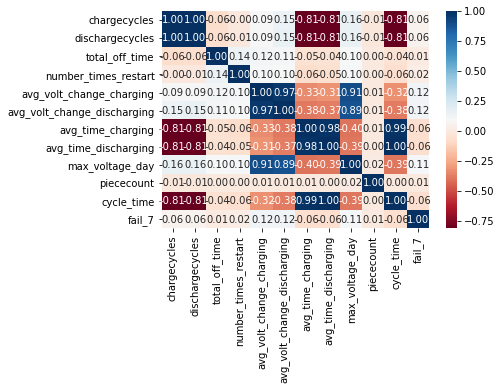

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
corr = df_train[['chargecycles','dischargecycles','total_off_time','number_times_restart','avg_volt_change_charging',
'avg_volt_change_discharging','avg_time_charging','avg_time_discharging','max_voltage_day',
'piececount','cycle_time','fail_7']].corr()
plt.autoscale()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu")
plt.show()

The above heatmap indicates the correlations of several attributes. We want to focus on attributes that describe features of the device. So certian attributes were selected. And dark blue/ dark red cells are the highly correlated attributes. 

(0.0, 250.0)

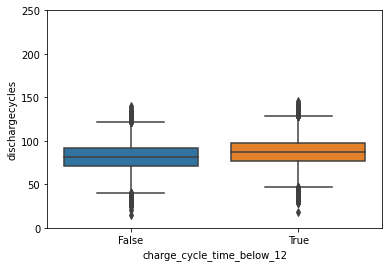

In [ ]:
sns.boxplot(data = df_train, x = 'charge_cycle_time_below_12', y = 'dischargecycles')
plt.ylim((0, 250))

Discharge cycle time gets slightly longer when charge cycle time is less than 12.

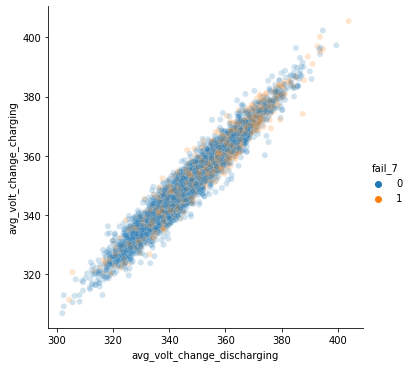

In [ ]:
df_sample=df_train.sample(7000)
sns.relplot(x='avg_volt_change_discharging', y="avg_volt_change_charging",data=df_sample, kind='scatter', alpha = .2, hue="fail_7")
##noticed highest correlation between voltage variables and fail_7 so began with a few plots of that 
##maybe include a heatmap to increase readability
##seems to be more fails on the upper right portion of the graph

For this plot we noticed that both the 'avg_volt_change_charging' and 'avg_volt_change_discharging' had relatively high correlation values to the fail_7 column in the correlation matric so we decided to create a scatter plot. Unfortunately the data was alittle too dense to exract any meaningful insight so instead we plotted a sample of the data and noticed while relatively uniform it does seem that higher values in both axis correlate to a larger proportion of failed meters. 

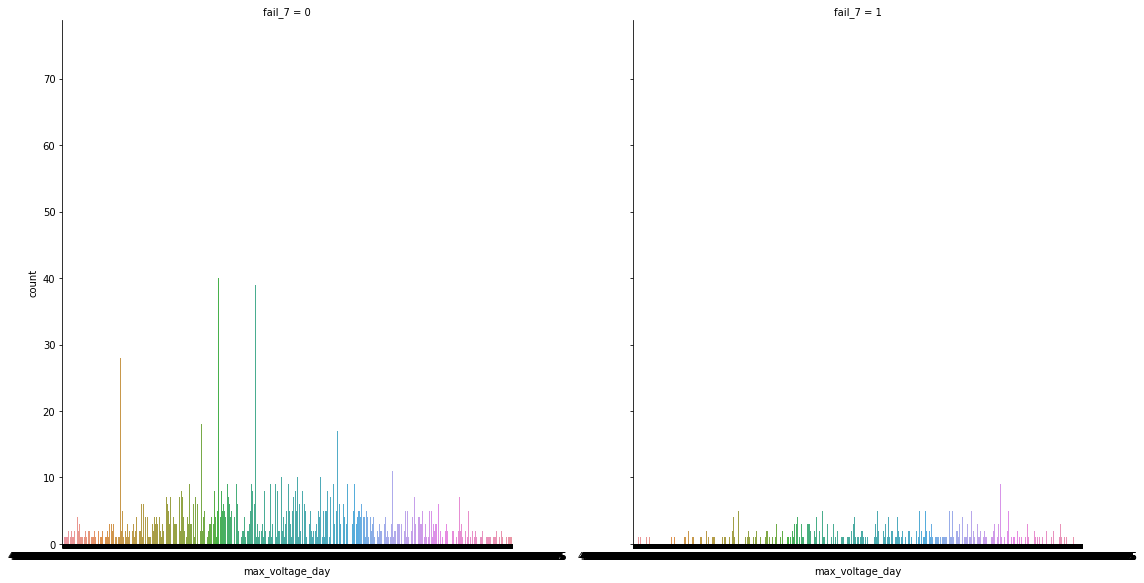

In [ ]:
sns.catplot(x = 'max_voltage_day', col = 'fail_7', kind = 'count', data = df_train, height = 8);
##distributions of max voltage across faied and not failed meters to see if there are any significant differences

Again by looking at the correlation matrix we noticed 'max_voltage_day' also had a relatively high correlation with the 'fail_7' column and wanted to take a look at the distributions of 'max_voltage_day' day values across meters that did and didn't fail to see if there were and significant differences in the distributions. From the image above we noticed that the meters that failed have comparatively higher counts in the larger max_voltage_day values.

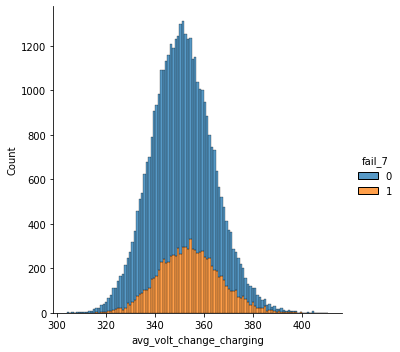

In [ ]:
sns.displot(df_train, x='avg_volt_change_charging', hue='fail_7', multiple='stack')

##stacked bar graph to see distributions of avg volg charging across all meters broken up by fail_7

Here we produced a stacked distribution of avg voltage charging broken down by working and failed meters where both distributions follow normal distribution centered around 350 volts.


<Figure size 576x576 with 0 Axes>

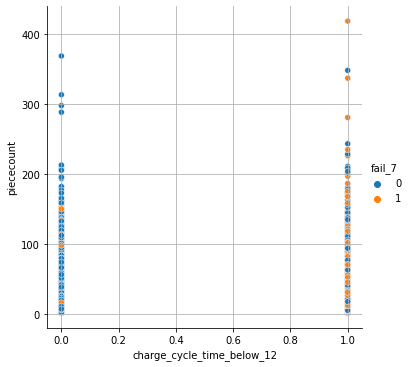

In [ ]:
plt.figure(figsize=(8, 8))
sns.relplot(x='charge_cycle_time_below_12', y="piececount",data=df_train, kind='scatter', hue="fail_7")
plt.grid()
##compare the charge cycle time below twelve for meters that did or did not fail

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


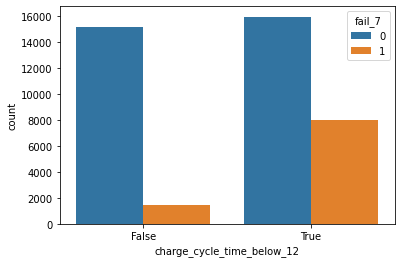

In [ ]:
sns.countplot(df_train['charge_cycle_time_below_12'], hue = df_train['fail_7'])

The scartter plot and count plot above show that, for devices that have charge cycles below 12, it is more likely to fail in 7 days. 

# Data Preparation
Data formatting - get dummies and drop null values. 

In [ ]:
df_train['fail_7'] = df_train['fail_7'].astype('category')
df_train['charge_cycle_time_below_12'] = pd.get_dummies(df_train['charge_cycle_time_below_12'],prefix_sep='_',drop_first=True)
df_train['charge_cycle_time_below_12'] = df_train['charge_cycle_time_below_12'].astype('category')

In [ ]:
for i in df_train.columns:
    print(i, df_train[i].isnull().sum())

deviceid 0
avg_time_charging_lag1 0
avg_time_charging_lag2 0
avg_time_charging_lag3 0
avg_time_charging_lag7 66
charging_rate_lag3 0
charging_rate_lag7 12
avg_time_discharging_lag1 0
avg_time_discharging_lag2 0
avg_time_discharging_lag3 0
avg_time_discharging_lag7 66
discharging_rate_lag3 0
discharging_rate_lag7 12
fail_7 0
charge_cycle_time_below_12 0
avg_time_charging_lag4 0
avg_time_discharging_lag4 0
avg_time_charging_lag5 7
avg_time_discharging_lag5 7
avg_time_charging_lag6 28
avg_time_discharging_lag6 28
avg_time_charging_lag8 162
avg_time_discharging_lag8 162
avg_time_charging_lag9 374
avg_time_discharging_lag9 374
avg_time_charging_lag10 797
avg_time_discharging_lag10 797
avg_time_charging_lag11 1586
avg_time_discharging_lag11 1586
avg_time_charging_lag12 2757
avg_time_discharging_lag12 2757
avg_time_charging_lag13 4382
avg_time_discharging_lag13 4382
avg_time_charging_lag14 6668
avg_time_discharging_lag14 6668
discharging_rate_lag4 0
discharging_rate_lag5 0
discharging_rate_la

#### Dropping the null values and saving the modified DataFrame as 'train'

In [ ]:
#Drop null values and save the modified DataFrame as 'train'
train = df_train.dropna(subset=['avg_time_discharging_lag14'], how='all')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33832 entries, 2 to 40499
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   deviceid                     33832 non-null  int64   
 1   avg_time_charging_lag1       33832 non-null  float64 
 2   avg_time_charging_lag2       33832 non-null  float64 
 3   avg_time_charging_lag3       33832 non-null  float64 
 4   avg_time_charging_lag7       33832 non-null  float64 
 5   charging_rate_lag3           33832 non-null  float64 
 6   charging_rate_lag7           33832 non-null  float64 
 7   avg_time_discharging_lag1    33832 non-null  float64 
 8   avg_time_discharging_lag2    33832 non-null  float64 
 9   avg_time_discharging_lag3    33832 non-null  float64 
 10  avg_time_discharging_lag7    33832 non-null  float64 
 11  discharging_rate_lag3        33832 non-null  float64 
 12  discharging_rate_lag7        33832 non-null  float64 
 13  f

In [ ]:
train.columns

Index(['deviceid', 'avg_time_charging_lag1', 'avg_time_charging_lag2',
       'avg_time_charging_lag3', 'avg_time_charging_lag7',
       'charging_rate_lag3', 'charging_rate_lag7', 'avg_time_discharging_lag1',
       'avg_time_discharging_lag2', 'avg_time_discharging_lag3',
       'avg_time_discharging_lag7', 'discharging_rate_lag3',
       'discharging_rate_lag7', 'fail_7', 'charge_cycle_time_below_12',
       'avg_time_charging_lag4', 'avg_time_discharging_lag4',
       'avg_time_charging_lag5', 'avg_time_discharging_lag5',
       'avg_time_charging_lag6', 'avg_time_discharging_lag6',
       'avg_time_charging_lag8', 'avg_time_discharging_lag8',
       'avg_time_charging_lag9', 'avg_time_discharging_lag9',
       'avg_time_charging_lag10', 'avg_time_discharging_lag10',
       'avg_time_charging_lag11', 'avg_time_discharging_lag11',
       'avg_time_charging_lag12', 'avg_time_discharging_lag12',
       'avg_time_charging_lag13', 'avg_time_discharging_lag13',
       'avg_time_charging_

In [ ]:
predictors = ['avg_time_charging_lag1', 'avg_time_charging_lag2',
       'avg_time_charging_lag3', 'avg_time_charging_lag7',
       'charging_rate_lag3', 'charging_rate_lag7', 'avg_time_discharging_lag1',
       'avg_time_discharging_lag2', 'avg_time_discharging_lag3',
       'avg_time_discharging_lag7', 'discharging_rate_lag3',
       'discharging_rate_lag7', 'charge_cycle_time_below_12',
       'avg_time_charging_lag4', 'avg_time_discharging_lag4',
       'avg_time_charging_lag5', 'avg_time_discharging_lag5',
       'avg_time_charging_lag6', 'avg_time_discharging_lag6',
       'avg_time_charging_lag8', 'avg_time_discharging_lag8',
       'avg_time_charging_lag9', 'avg_time_discharging_lag9',
       'avg_time_charging_lag10', 'avg_time_discharging_lag10',
       'avg_time_charging_lag11', 'avg_time_discharging_lag11',
       'avg_time_charging_lag12', 'avg_time_discharging_lag12',
       'avg_time_charging_lag13', 'avg_time_discharging_lag13',
       'avg_time_charging_lag14', 'avg_time_discharging_lag14',
       'discharging_rate_lag4', 'discharging_rate_lag5',
       'discharging_rate_lag6', 'discharging_rate_lag8', 'charging_rate_lag4',
       'charging_rate_lag5', 'charging_rate_lag6', 'chargecycles',
       'dischargecycles', 'total_off_time', 'number_times_restart',
       'avg_volt_change_charging', 'avg_volt_change_discharging',
       'avg_time_charging', 'avg_time_discharging', 'max_voltage_day',
       'piececount', 'cycle_time', 'LastRecord', 'Date Deployed']
outcome = 'fail_7' #target

#### Defining X and y to get our X set and y set

In [ ]:
X = train[predictors]
y = train['fail_7'].values

In [ ]:
X.dtypes

avg_time_charging_lag1          float64
avg_time_charging_lag2          float64
avg_time_charging_lag3          float64
avg_time_charging_lag7          float64
charging_rate_lag3              float64
charging_rate_lag7              float64
avg_time_discharging_lag1       float64
avg_time_discharging_lag2       float64
avg_time_discharging_lag3       float64
avg_time_discharging_lag7       float64
discharging_rate_lag3           float64
discharging_rate_lag7           float64
charge_cycle_time_below_12     category
avg_time_charging_lag4          float64
avg_time_discharging_lag4       float64
avg_time_charging_lag5          float64
avg_time_discharging_lag5       float64
avg_time_charging_lag6          float64
avg_time_discharging_lag6       float64
avg_time_charging_lag8          float64
avg_time_discharging_lag8       float64
avg_time_charging_lag9          float64
avg_time_discharging_lag9       float64
avg_time_charging_lag10         float64
avg_time_discharging_lag10      float64


#### Subtracting the column 'Last Record' from the column 'Date Deployed' in order to get the total number of days in use.

In [ ]:
fdate = X['Date Deployed'] = pd.to_datetime(X['Date Deployed'])
ldate = X['LastRecord'] = pd.to_datetime(X['LastRecord'])
X['Days_in_Service'] = (ldate - fdate)
X['Total_Days_in_Service'] = X['Days_in_Service'] / np.timedelta64(1, 'D')
X.head()

,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,discharging_rate_lag3,discharging_rate_lag7,charge_cycle_time_below_12,avg_time_charging_lag4,avg_time_discharging_lag4,avg_time_charging_lag5,avg_time_discharging_lag5,avg_time_charging_lag6,avg_time_discharging_lag6,avg_time_charging_lag8,avg_time_discharging_lag8,avg_time_charging_lag9,avg_time_discharging_lag9,avg_time_charging_lag10,avg_time_discharging_lag10,avg_time_charging_lag11,avg_time_discharging_lag11,avg_time_charging_lag12,avg_time_discharging_lag12,avg_time_charging_lag13,avg_time_discharging_lag13,avg_time_charging_lag14,avg_time_discharging_lag14,discharging_rate_lag4,discharging_rate_lag5,discharging_rate_lag6,discharging_rate_lag8,charging_rate_lag4,charging_rate_lag5,charging_rate_lag6,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,LastRecord,Date Deployed,Days_in_Service,Total_Days_in_Service
2,5.51,5.04,4.52,5.96,-0.460000,-0.083333,5.13,5.65,4.14,14.02,-2.643333,0.686667,0,25.01,40.69,6.03,6.06,5.72,5.73,22.46,31.82,33.92,58.87,45.87,76.36,5.78,6.23,5.13,4.37,4.73,3.50,26.79,41.29,-0.050000,0.240000,0.000000,0.216667,-0.026667,0.000000,-0.013333,80.380952,80.333333,2.333333,4.095238,346.113333,343.409524,13.675238,20.471429,4152.238095,19.200000,34.146667,2021-04-01,2019-10-31,518 days,518.0
3,4.66,39.85,35.76,40.69,0.076667,-0.006667,3.93,76.37,60.86,73.53,-0.166667,0.033333,0,4.71,3.74,4.74,3.73,24.01,52.99,5.09,5.32,4.45,4.22,22.14,30.51,4.39,4.15,4.71,3.82,13.27,18.62,4.97,4.16,0.013333,0.406667,-0.293333,-0.046667,-0.030000,0.460000,1.340000,91.736842,91.684211,10.789474,0.736842,356.184211,349.844737,16.306842,26.189474,4164.631579,23.625000,42.496316,2021-04-01,2019-10-01,548 days,548.0
4,5.10,43.24,4.63,5.26,0.040000,-0.153333,4.69,71.44,3.80,6.29,0.066667,-1.030000,1,40.36,82.70,15.47,24.21,45.64,76.42,26.63,45.04,27.99,40.57,5.01,6.52,5.47,4.64,5.28,5.16,25.10,47.76,21.62,37.29,-0.353333,0.983333,-0.006667,-1.790000,0.016667,1.606667,0.013333,71.066667,70.733333,14.266667,1.133333,370.904000,367.730000,18.797333,30.812000,4169.800000,12.666667,49.609333,2021-04-01,2019-09-13,566 days,566.0
5,27.74,5.12,42.39,5.46,0.076667,-0.020000,45.90,3.99,75.64,4.36,-0.023333,0.040000,0,4.35,4.21,47.38,88.32,4.60,4.54,4.94,4.65,37.91,76.00,5.93,4.46,5.09,5.03,5.48,4.18,4.64,4.19,4.98,3.36,-0.360000,-0.143333,0.573333,0.800000,0.396667,0.036667,0.326667,100.900000,100.550000,10.700000,2.150000,350.345500,346.747500,12.878500,19.621000,4151.600000,6.375000,32.499500,2021-04-01,2019-10-05,544 days,544.0
6,4.67,5.32,23.99,4.62,0.270000,-0.010000,3.56,4.62,18.57,3.74,-0.350000,-0.010000,0,4.76,3.46,5.63,4.29,6.21,5.14,24.89,49.26,5.31,5.37,25.47,43.57,25.92,40.73,37.76,57.95,20.04,35.44,4.42,4.19,-0.026667,-0.446667,4.236667,-0.010000,0.020000,0.016667,5.963333,72.130435,71.869565,60.304348,1.956522,358.789130,353.025652,17.384783,27.495217,4170.652174,20.500000,44.880000,2021-04-01,2019-09-13,566 days,566.0


#### Dropping the columns 'Last Record', 'Date Deployed', and 'Days_in_Service' now that we have total number of days in use.

In [ ]:
X_new = X.drop(['LastRecord', 'Date Deployed', 'Days_in_Service'], axis = 1)

#### Splitting the training data into training set and test set 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_new, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
X_train.head()

Train set: (27065, 52) (27065,)
Test set: (6767, 52) (6767,)


,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,discharging_rate_lag3,discharging_rate_lag7,charge_cycle_time_below_12,avg_time_charging_lag4,avg_time_discharging_lag4,avg_time_charging_lag5,avg_time_discharging_lag5,avg_time_charging_lag6,avg_time_discharging_lag6,avg_time_charging_lag8,avg_time_discharging_lag8,avg_time_charging_lag9,avg_time_discharging_lag9,avg_time_charging_lag10,avg_time_discharging_lag10,avg_time_charging_lag11,avg_time_discharging_lag11,avg_time_charging_lag12,avg_time_discharging_lag12,avg_time_charging_lag13,avg_time_discharging_lag13,avg_time_charging_lag14,avg_time_discharging_lag14,discharging_rate_lag4,discharging_rate_lag5,discharging_rate_lag6,discharging_rate_lag8,charging_rate_lag4,charging_rate_lag5,charging_rate_lag6,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,Total_Days_in_Service
11164,6.10,4.96,5.86,29.79,0.016667,-0.016667,5.64,3.34,6.13,43.38,-0.006667,0.003333,1,4.85,3.66,32.43,59.35,5.80,4.86,4.96,4.32,4.61,3.84,24.81,37.14,47.33,98.56,29.87,58.61,46.84,85.44,4.46,4.18,0.023333,-0.003333,0.163333,-1.013333,-0.013333,0.003333,-0.086667,105.450000,105.100000,9.300000,0.900000,345.797500,340.061000,16.057500,26.276500,4153.300000,16.461538,42.334000,526.0
34238,26.36,4.90,43.73,4.92,-0.130000,-0.030000,59.50,4.71,77.05,3.40,4.006667,0.000000,0,4.59,3.61,34.42,53.83,44.31,73.77,42.09,67.55,4.87,3.61,4.42,3.46,4.97,5.46,20.89,29.09,5.62,6.35,5.39,4.51,-4.043333,-0.050000,-1.223333,0.993333,-2.456667,-0.030000,-0.086667,78.833333,78.666667,38.055556,3.500000,363.081111,359.713889,17.792222,30.001111,4165.277778,16.666667,47.793333,506.0
34127,33.24,6.55,6.20,17.54,-0.036667,-0.030000,60.90,5.64,5.77,31.37,-0.023333,-0.240000,0,4.95,3.10,6.38,5.28,34.27,53.75,6.24,5.79,4.85,4.08,44.28,58.20,33.27,64.77,5.43,5.61,19.06,27.17,23.99,38.45,-0.146667,-0.023333,-0.183333,-3.566667,-0.013333,0.073333,0.256667,52.705882,52.705882,0.000000,0.764706,341.968235,343.261765,19.208235,29.970000,4148.294118,18.461538,49.178235,547.0
5187,5.03,4.40,4.53,4.65,5.750000,0.040000,3.55,4.20,4.04,4.79,-0.053333,0.086667,0,5.04,4.14,48.20,99.06,4.55,4.22,53.03,94.62,30.34,49.82,36.76,57.25,30.12,52.00,4.48,4.09,5.19,4.46,5.12,5.71,0.060000,-0.006667,0.010000,-0.123333,-0.006667,-0.036667,0.013333,84.727273,84.681818,48.727273,1.636364,358.841364,355.750909,17.415000,27.419091,4162.363636,19.727273,44.834091,556.0
35759,31.69,28.22,32.12,50.72,-0.686667,0.396667,70.03,44.78,55.00,74.17,0.010000,-0.906667,0,25.03,33.62,5.68,4.38,33.90,60.67,45.24,94.17,17.69,28.77,4.59,3.86,11.88,19.28,32.64,49.66,4.54,4.19,5.06,4.67,0.010000,-2.666667,0.240000,-0.003333,-0.686667,0.670000,-0.536667,48.944444,48.833333,0.944444,2.388889,347.718889,348.037778,24.326111,41.377778,4151.166667,8.700000,65.703889,555.0


In [ ]:
y

[0, 0, 0, 0, 0, ..., 1, 1, 1, 0, 1]
Length: 33832
Categories (2, int64): [0, 1]

In [ ]:
y_train

[1, 0, 0, 0, 0, ..., 0, 1, 0, 0, 0]
Length: 27065
Categories (2, int64): [0, 1]

In [ ]:
y_test

[0, 0, 0, 0, 0, ..., 0, 0, 0, 1, 0]
Length: 6767
Categories (2, int64): [0, 1]

# Normalization

#### Normalizing both the X training and test set using the standard scale of (0, 1).

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_train_norm = pd.DataFrame(scale.fit_transform(X_train), columns = X_train.columns)
X_train_norm.head()
X_test_norm = pd.DataFrame(scale.fit_transform(X_test), columns = X_test.columns)
X_test_norm.head()


,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,discharging_rate_lag3,discharging_rate_lag7,charge_cycle_time_below_12,avg_time_charging_lag4,avg_time_discharging_lag4,avg_time_charging_lag5,avg_time_discharging_lag5,avg_time_charging_lag6,avg_time_discharging_lag6,avg_time_charging_lag8,avg_time_discharging_lag8,avg_time_charging_lag9,avg_time_discharging_lag9,avg_time_charging_lag10,avg_time_discharging_lag10,avg_time_charging_lag11,avg_time_discharging_lag11,avg_time_charging_lag12,avg_time_discharging_lag12,avg_time_charging_lag13,avg_time_discharging_lag13,avg_time_charging_lag14,avg_time_discharging_lag14,discharging_rate_lag4,discharging_rate_lag5,discharging_rate_lag6,discharging_rate_lag8,charging_rate_lag4,charging_rate_lag5,charging_rate_lag6,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,Total_Days_in_Service
0,0.862456,0.045214,0.037386,0.139139,0.526446,0.426991,0.769656,0.016634,0.021111,0.186012,0.654796,0.499117,0.0,0.020769,0.014655,0.048410,0.016657,0.532656,0.656680,0.032650,0.019061,0.022629,0.016515,0.030646,0.021396,0.280169,0.311412,0.026417,0.023233,0.032447,0.025294,0.037297,0.016011,0.647187,0.449448,0.657197,0.490213,0.459143,0.469318,0.311256,0.634560,0.634137,0.000899,0.010836,0.586530,0.559203,0.323887,0.325787,0.522172,0.107999,0.330616,0.827815
1,0.493802,0.477242,0.037518,0.073662,0.511361,0.432153,0.733254,0.658218,0.021679,0.038557,0.659777,0.487856,1.0,0.045957,0.019475,0.051220,0.018127,0.024673,0.014979,0.328589,0.423707,0.040319,0.024338,0.028986,0.013598,0.042582,0.043487,0.431331,0.408528,0.025774,0.017511,0.030877,0.016111,0.589392,0.521067,0.655376,0.491282,0.442800,0.474432,0.315850,0.687240,0.687085,0.000472,0.035897,0.357301,0.348601,0.278693,0.301619,0.414353,0.036622,0.298280,0.761589
2,0.254132,0.663844,0.052632,0.064672,0.510980,0.423304,0.418763,0.802079,0.038531,0.025705,0.669210,0.498786,1.0,0.036972,0.030196,0.337719,0.385851,0.290804,0.408465,0.037115,0.035044,0.018805,0.009948,0.031250,0.019019,0.691393,0.790836,0.451640,0.669552,0.420550,0.577488,0.345613,0.394576,0.626632,0.441312,0.653555,0.508183,0.442646,0.487689,0.320827,0.366113,0.366445,0.008544,0.027400,0.342636,0.350976,0.574150,0.616481,0.285428,0.036584,0.613927,0.629139
3,0.041617,0.052926,0.043219,0.649805,0.505633,0.424484,0.034428,0.033960,0.015810,0.837202,0.651404,0.461250,0.0,0.664752,0.745746,0.056457,0.018421,0.030479,0.024329,0.227292,0.180582,0.033625,0.028491,0.582428,0.574458,0.048751,0.046503,0.357904,0.460186,0.044414,0.033077,0.034240,0.013509,0.628406,0.452268,0.655084,0.490320,0.492908,0.464773,0.315658,0.437771,0.438357,0.008769,0.020708,0.386104,0.354482,0.491393,0.487054,0.349077,0.078606,0.498110,0.655629
4,0.029368,0.049297,0.696540,0.054206,0.550315,0.409440,0.016080,0.014752,0.677364,0.014546,0.675888,0.467432,0.0,0.202386,0.306777,0.465194,0.423182,0.504684,0.666432,0.048835,0.031768,0.467092,0.433939,0.354620,0.374572,0.053566,0.032007,0.021304,0.008017,0.341848,0.668061,0.603027,0.776143,0.627761,0.450979,0.634980,0.437694,0.479494,0.466667,0.290582,0.213721,0.213812,0.027372,0.049391,0.237242,0.150623,0.785176,0.783104,0.238493,0.043011,0.800652,0.688742


In [ ]:
X_train_norm.shape

(27065, 52)

#### Changing the column 'charge_cycle_time_below_12' to binary values, False = 0, True = 1.

In [ ]:
X_train['charge_cycle_time_below_12'] = X_train['charge_cycle_time_below_12'].astype(float)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27065 entries, 11164 to 20994
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   avg_time_charging_lag1       27065 non-null  float64
 1   avg_time_charging_lag2       27065 non-null  float64
 2   avg_time_charging_lag3       27065 non-null  float64
 3   avg_time_charging_lag7       27065 non-null  float64
 4   charging_rate_lag3           27065 non-null  float64
 5   charging_rate_lag7           27065 non-null  float64
 6   avg_time_discharging_lag1    27065 non-null  float64
 7   avg_time_discharging_lag2    27065 non-null  float64
 8   avg_time_discharging_lag3    27065 non-null  float64
 9   avg_time_discharging_lag7    27065 non-null  float64
 10  discharging_rate_lag3        27065 non-null  float64
 11  discharging_rate_lag7        27065 non-null  float64
 12  charge_cycle_time_below_12   27065 non-null  float64
 13  avg_time_cha

# Principal Component Analysis
Specified that we wanted 95% of the variance to be retained, then turning it into an array and printing the total number of components.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(.95)
pca.fit(X_train_norm)
x_95 = pca.transform(X_train_norm)
print(pca.n_components_)

16


We get a total number of 16 components while retaining 95% of the variance. We then look at the explained variance ratio for the pca and plot the ratio.

[12.83605767  8.84521127  6.68081894  6.62116244  6.27157924  6.13443201
  6.04065423  5.75874422  5.47981291  5.35947622  5.23468686  5.12552771
  5.04228779  4.78331713  4.59029803  1.95020795]


Text(0, 0.5, 'Explained variance')

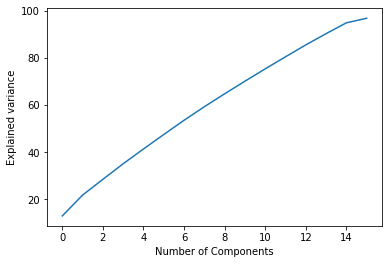

In [ ]:
#explained variance for each principal component
e_var = pca.explained_variance_ratio_*100
print(e_var)

#plotting explained variance ratio for 95%
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.cumsum(e_var))
plt.xlabel('Number of Components')
plt.ylabel('Explained variance')

Create a new dataset with the 16 principal components to be used when training our models.

In [ ]:
pca_train = pd.DataFrame(x_95, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 
                                          'PC15', 'PC16'])

Transforming X test test with the components we found using X train.

In [ ]:
X_test_transformed = pca.transform(X_test_norm)
pca_test = pd.DataFrame(X_test_transformed, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 
                                          'PC15', 'PC16'])

# Linear Discriminant Analysis (with One Linear Discriminant)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
lda_X_train_norm = lda.fit_transform(X_train_norm, y_train)
lda_X_test_norm = lda.transform(X_test_norm)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth = 2, random_state = 0)

classifier.fit(X_train_norm, y_train)
y_pred = classifier.predict(X_test_norm)

#### Evaluating the analysis with one linear discriminant, which gives us 76% accuracy. PCA appears to be better in this instance.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[5149    0]
 [1618    0]]
Accuracy 0.7608984779074922


### We now have two different datasets to run models on: 
pca_train : pca for 95% of variance, 16 components \
X_train_norm : full X train set, normalized

### Can evaluate our models using:
X_test_transformed : X_test set transformed with the 16 components from pca \
X_test_norm : X test set, normalized

# Modeling

### KNN

#### KNN Model with Normalized Dataset

In [ ]:
#Using accuracy_score to get the best K
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1)) #Return a new array of given shape and type, filled with zeros.
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_norm, y_train)
    yhat = neigh.predict(X_test_norm)
    #jaccard_similarity_score function.
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat) 
    std_acc[n-1]=np.std(yhat == y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.66100192, 0.73237772, 0.70503916, 0.73887986, 0.72336338,
       0.74405202, 0.73016108, 0.74774642, 0.73282104])

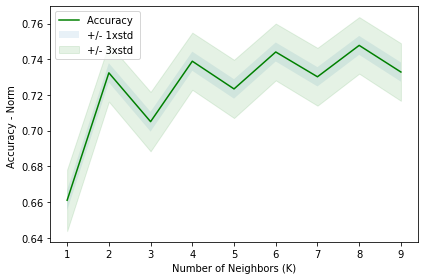

In [ ]:
#Plot model accuracy for different number of neighbors
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy - Norm ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k =", mean_acc.argmax()+1) 

The best accuracy was with 0.747746416432688 with k = 8


In [ ]:
#Fit KNN model with K=8
neigh_8 = KNeighborsClassifier(n_neighbors=8).fit(X_train_norm,y_train)
yhat_8 = neigh_8.predict(X_test_norm)

In [ ]:
#Evaluate KNN model
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report 
print("Accuracy:",accuracy_score(y_test, yhat_8))
print("precision score: ", precision_score(y_test,yhat_8))
print("recall score: ", recall_score(y_test,yhat_8))
print("f1-score: ", f1_score(y_test,yhat_8))

Accuracy: 0.747746416432688
precision score:  0.4
recall score:  0.1100123609394314
f1-score:  0.172564226854096


#### KNN Model with PCA

In [ ]:
# Trian model to get the best K value
Ks = 10
mean_acc = np.zeros((Ks-1)) #Return a new array of given shape and type, filled with zeros.
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(pca_train, y_train)
    yhat = neigh.predict(X_test_transformed)
    #jaccard_similarity_score function.
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat) 
    std_acc[n-1]=np.std(yhat == y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.66247968, 0.73282104, 0.70016255, 0.73843653, 0.71863455,
       0.74213093, 0.72454559, 0.74449535, 0.73075218])

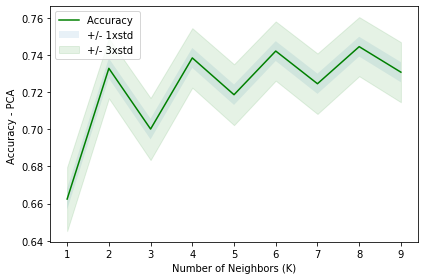

In [ ]:
#Plot model accuracy for different number of neighbors
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy - PCA ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k =", mean_acc.argmax()+1) 

The best accuracy was with 0.7444953450568937 with k = 8


In [ ]:
# Fit KNN model with K = 8
neigh_pca = KNeighborsClassifier(n_neighbors=2).fit(pca_train,y_train)
yhat_pca = neigh_pca.predict(pca_test)

In [ ]:
# Evaluation of KNN model with k = 8
print("Accuracy:",accuracy_score(y_test, yhat_pca))
print("precision score: ", precision_score(y_test,yhat_pca))
print("recall score: ", recall_score(y_test,yhat_pca))
print("f1-score: ", f1_score(y_test,yhat_pca))

Accuracy: 0.7328210432983597
precision score:  0.33035714285714285
recall score:  0.11433868974042027
f1-score:  0.16988062442607899


### Decision Tree


#### Decision Tree with Normalized Dataset

In [ ]:
##regression tree with regular normalized variables 
from sklearn.tree import DecisionTreeClassifier
dt_norm = DecisionTreeClassifier(max_depth = 4)
dt_norm.fit(X_train_norm, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt_norm_importances = dt_norm.feature_importances_
dt_norm_df = pd.DataFrame({'feature': X_train_norm.columns, 'importance': dt_norm_importances})
dt_norm_df = dt_norm_df.sort_values('importance', ascending = False)
print(dt_norm_df)

                        feature  importance
12   charge_cycle_time_below_12    0.452170
10        discharging_rate_lag3    0.400393
4            charging_rate_lag3    0.114280
44     avg_volt_change_charging    0.019759
43         number_times_restart    0.004972
42               total_off_time    0.002825
0        avg_time_charging_lag1    0.002424
11        discharging_rate_lag7    0.002176
33        discharging_rate_lag4    0.001002
46            avg_time_charging    0.000000
38           charging_rate_lag5    0.000000
30   avg_time_discharging_lag13    0.000000
31      avg_time_charging_lag14    0.000000
32   avg_time_discharging_lag14    0.000000
34        discharging_rate_lag5    0.000000
35        discharging_rate_lag6    0.000000
36        discharging_rate_lag8    0.000000
37           charging_rate_lag4    0.000000
39           charging_rate_lag6    0.000000
45  avg_volt_change_discharging    0.000000
40                 chargecycles    0.000000
41              dischargecycles 

In [ ]:
pip install dmba

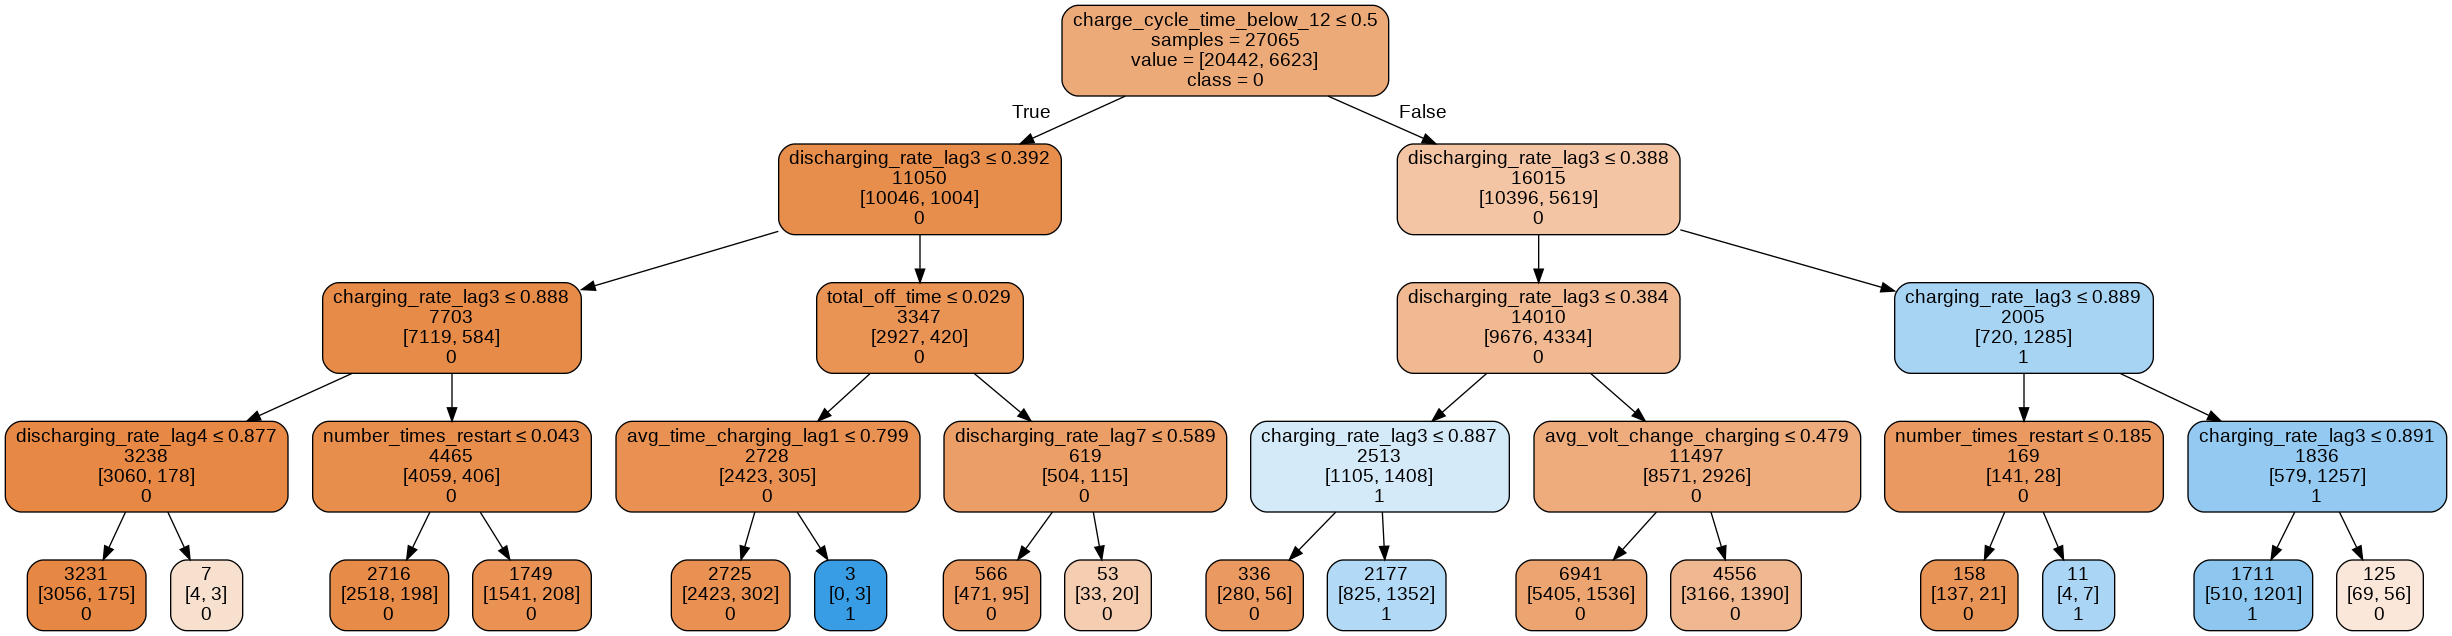

In [ ]:
from dmba import plotDecisionTree, gainsChart, liftChart
from dmba import classificationSummary, regressionSummary

plotDecisionTree(dt_norm, feature_names=X_train_norm.columns, class_names=dt_norm.classes_)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
print("Accuracy:",accuracy_score(y_test, dt_norm.predict(X_test_norm)))
print("precision score: ", precision_score(y_test,dt_norm.predict(X_test_norm)))
print("recall score: ", recall_score(y_test,dt_norm.predict(X_test_norm)))
print("f1-score: ", f1_score(y_test,dt_norm.predict(X_test_norm)))


Accuracy: 0.7543963351559037
precision score:  0.375
recall score:  0.0407911001236094
f1-score:  0.07357859531772576


In [ ]:
X_train_norm_select = X_train_norm[['charge_cycle_time_below_12', 'discharging_rate_lag3', 'charging_rate_lag3', 'avg_volt_change_charging', 'number_times_restart', 'total_off_time','avg_time_charging_lag1', 'discharging_rate_lag7', 'discharging_rate_lag4']]
X_test_norm_select = X_test_norm[['charge_cycle_time_below_12', 'discharging_rate_lag3', 'charging_rate_lag3', 'avg_volt_change_charging', 'number_times_restart', 'total_off_time','avg_time_charging_lag1', 'discharging_rate_lag7', 'discharging_rate_lag4']]
dt_norm_select = DecisionTreeClassifier(max_depth = 4)
dt_norm_select.fit(X_train_norm_select, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
X_train_norm_select

,charge_cycle_time_below_12,discharging_rate_lag3,charging_rate_lag3,avg_volt_change_charging,number_times_restart,total_off_time,avg_time_charging_lag1,discharging_rate_lag7,discharging_rate_lag4
0,1.0,0.385701,0.889715,0.397579,0.017491,0.006238,0.056639,0.559811,0.782318
1,0.0,0.454785,0.888020,0.572135,0.092551,0.025527,0.306639,0.559711,0.728252
2,0.0,0.385414,0.889099,0.358905,0.013585,0.000000,0.391535,0.552492,0.780058
3,0.0,0.384898,0.955994,0.529315,0.038749,0.032686,0.043435,0.562318,0.782805
4,0.0,0.385988,0.881585,0.416984,0.060474,0.000634,0.372409,0.532438,0.782140
...,...,...,...,...,...,...,...,...,...
27060,0.0,0.389087,0.907634,0.609559,0.068493,0.029023,0.060464,0.549584,0.716331
27061,1.0,0.385759,0.889561,0.524831,0.231247,0.146902,0.504812,0.485310,0.777975
27062,1.0,0.385586,0.889600,0.419768,0.037033,0.008462,0.043929,0.559912,0.782185
27063,1.0,0.387308,0.887211,0.401254,0.030001,0.004600,0.590819,0.602727,0.770352


In [ ]:
dt_norm_importances_select = dt_norm_select.feature_importances_
dt_norm_df_select = pd.DataFrame({'feature': X_train_norm_select.columns, 'importance': dt_norm_importances_select})
dt_norm_df_select = dt_norm_df_select.sort_values('importance', ascending = False)
print(dt_norm_df_select)

                      feature  importance
0  charge_cycle_time_below_12    0.452170
1       discharging_rate_lag3    0.400393
2          charging_rate_lag3    0.114280
3    avg_volt_change_charging    0.019759
4        number_times_restart    0.004972
5              total_off_time    0.002825
6      avg_time_charging_lag1    0.002424
7       discharging_rate_lag7    0.002176
8       discharging_rate_lag4    0.001002


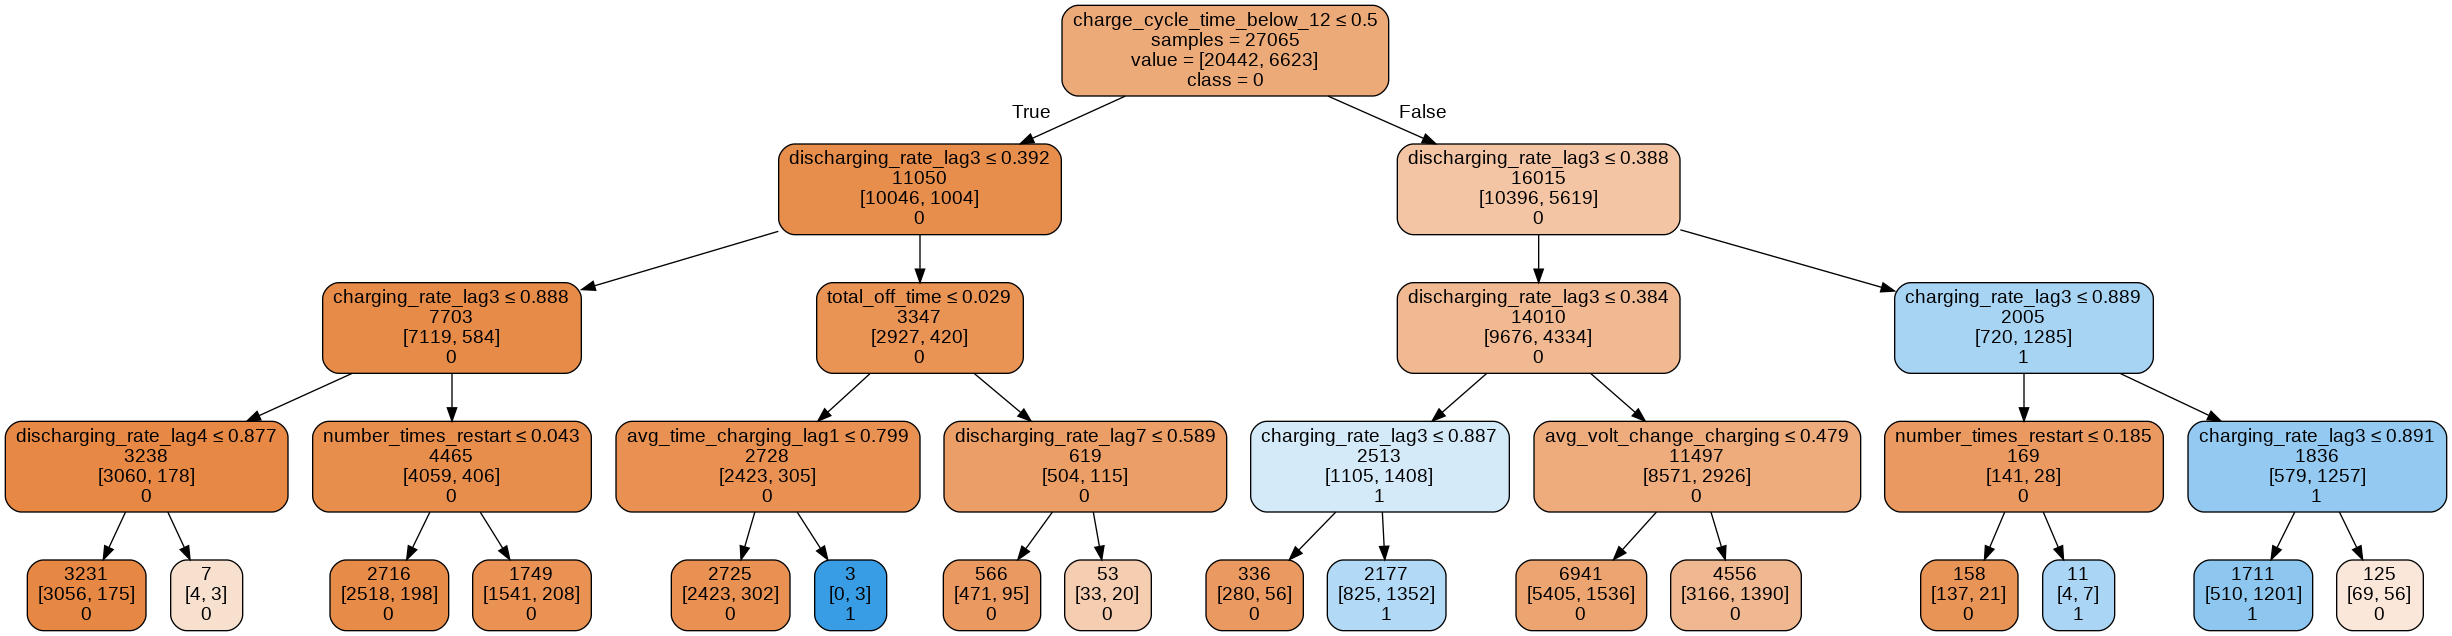

In [ ]:
plotDecisionTree(dt_norm_select, feature_names=X_train_norm_select.columns, class_names=dt_norm_select.classes_)

In [ ]:
print("Accuracy:",accuracy_score(y_test, dt_norm_select.predict(X_test_norm_select)))
print("precision score: ", precision_score(y_test,dt_norm_select.predict(X_test_norm_select)))
print("recall score: ", recall_score(y_test,dt_norm_select.predict(X_test_norm_select)))
print("f1-score: ", f1_score(y_test,dt_norm_select.predict(X_test_norm_select)))


Accuracy: 0.7543963351559037
precision score:  0.375
recall score:  0.0407911001236094
f1-score:  0.07357859531772576


#### Decision Tree with PCA

In [ ]:
dt_pca = DecisionTreeClassifier(max_depth = 4)
dt_pca.fit(pca_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt_pca_importances = dt_pca.feature_importances_
dt_pca_df = pd.DataFrame({'feature': pca_train.columns, 'importance': dt_pca_importances})
dt_pca_df = dt_pca_df.sort_values('importance', ascending = False)
print(dt_pca_df)

   feature  importance
0      PC1    0.833184
15    PC16    0.140189
6      PC7    0.004854
1      PC2    0.004739
12    PC13    0.004455
2      PC3    0.004274
9     PC10    0.004141
11    PC12    0.002301
14    PC15    0.001864
3      PC4    0.000000
4      PC5    0.000000
5      PC6    0.000000
7      PC8    0.000000
8      PC9    0.000000
10    PC11    0.000000
13    PC14    0.000000


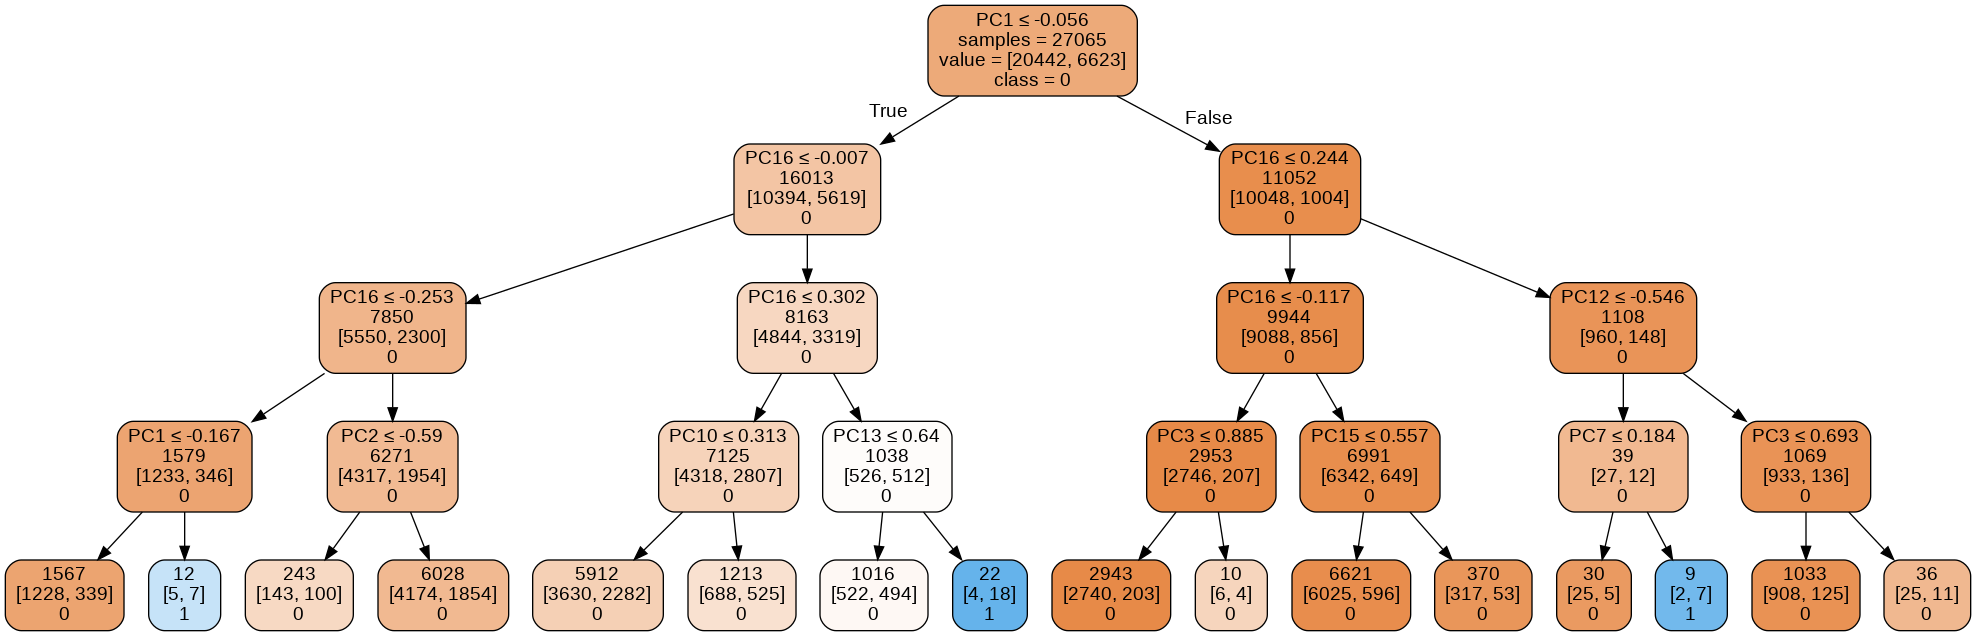

In [ ]:

from dmba import plotDecisionTree, gainsChart, liftChart
from dmba import classificationSummary, regressionSummary

plotDecisionTree(dt_pca, feature_names=pca_train.columns, class_names=dt_pca.classes_)

In [ ]:

print("Accuracy:",accuracy_score(y_test, dt_pca.predict(pca_test)))
print("precision score: ", precision_score(y_test,dt_pca.predict(pca_test)))
print("recall score: ", recall_score(y_test,dt_pca.predict(pca_test)))
print("f1-score: ", f1_score(y_test,dt_pca.predict(pca_test)))

Accuracy: 0.7603073740209841
precision score:  0.4473684210526316
recall score:  0.010506798516687269
f1-score:  0.020531400966183576


### Logistic Regression

#### Logistic Regression with Normalized Data

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

logit = LogisticRegression(penalty="l2", solver='liblinear')
#LogisticRegression with normalized data
logit.fit(X_train_norm,y_train)

print('The intercept is', logit.intercept_[0])
print(pd.DataFrame({'coefficient': logit.coef_[0]}, index=X_train_norm.columns).sort_values('coefficient',ascending=False))
print()

#Result evaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report #Only 38% accuracy 
print("Accuracy:",accuracy_score(y_test, logit.predict(X_test_norm)))
print("precision score: ", precision_score(y_test,logit.predict(X_test_norm)))
print("recall score: ", recall_score(y_test,logit.predict(X_test_norm)))
print("f1-score: ", f1_score(y_test,logit.predict(X_test_norm)))



The intercept is -2.4001833212921158
                             coefficient
avg_volt_change_charging        2.579951
discharging_rate_lag3           2.266364
charge_cycle_time_below_12      1.686392
Total_Days_in_Service           0.997456
avg_time_discharging            0.869621
avg_volt_change_discharging     0.761477
chargecycles                    0.720961
cycle_time                      0.675803
dischargecycles                 0.657580
avg_time_charging_lag7          0.541506
avg_time_charging_lag12         0.424249
avg_time_charging_lag13         0.356941
number_times_restart            0.329172
avg_time_charging_lag14         0.294871
avg_time_charging               0.291521
avg_time_charging_lag3          0.243706
avg_time_charging_lag1          0.238242
avg_time_charging_lag5          0.223475
avg_time_discharging_lag4       0.147490
avg_time_charging_lag11         0.134028
discharging_rate_lag4           0.098695
avg_time_charging_lag9          0.098046
avg_time_discharging

#### Logistic Regression with PCA

In [ ]:
#LogisticRegression with PCA data
logit.fit(pca_train,y_train)

print('intercept ', logit.intercept_[0])
print(pd.DataFrame({'coefficient': logit.coef_[0]}, index=pca_train.columns).sort_values('coefficient',ascending=False))
print()

#Result evaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report #75%
print("Accuracy:",accuracy_score(y_test, logit.predict(pca_test)))
print("precision score: ", precision_score(y_test,logit.predict(pca_test)))
print("recall score: ", recall_score(y_test,logit.predict(pca_test)))
print("f1-score: ", f1_score(y_test,logit.predict(pca_test)))


intercept  -1.3221137168156991
      coefficient
PC16     1.331101
PC2      0.304818
PC12     0.053244
PC15     0.039175
PC9      0.033756
PC10     0.011102
PC3      0.008691
PC8      0.007722
PC6     -0.012931
PC5     -0.015477
PC11    -0.022534
PC13    -0.040000
PC14    -0.061958
PC7     -0.080834
PC4     -0.081949
PC1     -1.670785

Accuracy: 0.7616373577656274
precision score:  0.5242718446601942
recall score:  0.03337453646477132
f1-score:  0.06275421266705404


### Naive Bayes

#### Naive Bayes with Normalized Data

In [ ]:
pip install dmba

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

#Naive Bayes with normalized data
nb.fit(X_train_norm,y_train)

## predict class membership
y_valid_pred = nb.predict(X_test_norm)
y_train_pred = nb.predict(X_train_norm)

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from dmba import regressionSummary, classificationSummary
## training
classificationSummary(y_train, nb.predict(X_train_norm))

#Result evaluation
print('\nAccuracy:', accuracy_score(y_test,y_valid_pred)) #76% accuracy 
print('Precision score:', 4671/(4671+8337))
print('Recall score:', 4671/(4671+1952))
print('F1 score:', 4671/(4671+(1952+8337)/2))

Confusion Matrix (Accuracy 0.6198)

       Prediction
Actual     0     1
     0 12105  8337
     1  1952  4671

Accuracy: 0.7608984779074922
Precision score: 0.3590867158671587
Recall score: 0.7052695153253813
F1 score: 0.4758799857368448


#### Naive Bayes with PCA 

In [ ]:
#Naive Bayes with pca data
nb.fit(pca_train,y_train)

## predict class membership
y_valid_pred = nb.predict(pca_test)
y_train_pred = nb.predict(pca_train)

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from dmba import regressionSummary, classificationSummary
## training
classificationSummary(y_train, nb.predict(pca_train))

#Result evaluation
print('\nAccuracy:', accuracy_score(y_test,y_valid_pred)) #74% 
print('Precision score:', precision_score(y_test,y_valid_pred))
print('Recall score:', recall_score(y_test,y_valid_pred))
print('F1 score:', f1_score(y_test,y_valid_pred))

Confusion Matrix (Accuracy 0.7546)

       Prediction
Actual     0     1
     0 20054   388
     1  6253   370

Accuracy: 0.7591251662479681
Precision score: 0.4819277108433735
Recall score: 0.09888751545117429
F1 score: 0.1641025641025641


In [ ]:
##Random Forrest

In [ ]:
#with normalized data
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

X_train_norm, y_train = make_regression(n_features=52, n_informative=2,
                        random_state=0, shuffle=False)
regr_norm = RandomForestRegressor(max_depth = 2, random_state = 0)
regr_norm.fit(X_train_norm, y_train)

regr_norm

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

# Summary for Evaluation of Models 

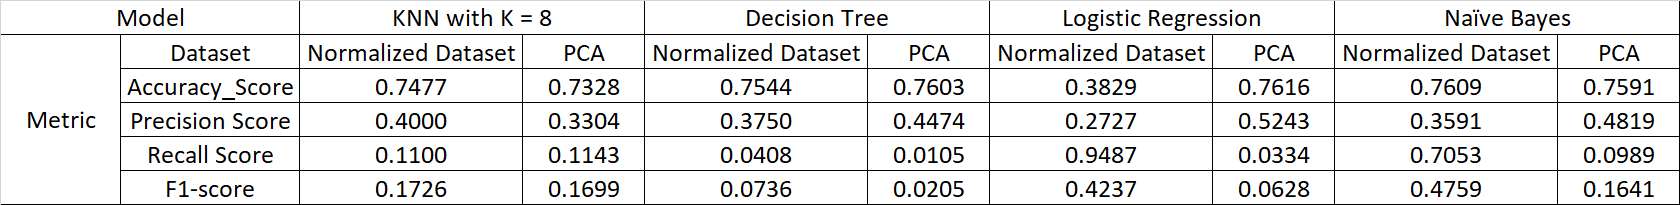

As a classification problem, we first looked at the accuracy scores where all our models returned values in the range from 0.73 to 0.77 except Logistic Regression model with normalized dataset, whose accuracy is only 0.38.  The Logistic Regression fit with the PCA's has highest accuracy 0.7616. 

Since none of the models were able to produce a significantly better accuracy score than the others, we then looked at the F1 scores to which we found our Logistic Regression model fit with our normalized dataset returning the largest value 0.42, but since it returned the lowest accuracy score we are not going to consider it as our choice. The Naive Bayes model fit with PCA's retuned strong precision and recall score compared to the other models. Finally, the Naive Bayes fit with PCA's returned the best F1 score of the remaining models still being considered. Therefore, the Naive Bayes fit with PCA's is our best fit model.

# Deploying the model

## Clearning Test Dataset

In [ ]:
#Data formatting - get dummies and drop null values.
df_test['charge_cycle_time_below_12'] = pd.get_dummies(df_train['charge_cycle_time_below_12'],prefix_sep='_',drop_first=True)
df_test['charge_cycle_time_below_12'] = df_test['charge_cycle_time_below_12'].astype('category')

#Dropping the null values and saving the modified DataFrame as 'test'
#Drop null values and save the modified DataFrame as 'test'
test = df_test.dropna(subset=['avg_time_discharging_lag14'], how='all')
test.columns
predictors = ['avg_time_charging_lag1', 'avg_time_charging_lag2',
       'avg_time_charging_lag3', 'avg_time_charging_lag7',
       'charging_rate_lag3', 'charging_rate_lag7', 'avg_time_discharging_lag1',
       'avg_time_discharging_lag2', 'avg_time_discharging_lag3',
       'avg_time_discharging_lag7', 'discharging_rate_lag3',
       'discharging_rate_lag7', 'charge_cycle_time_below_12',
       'avg_time_charging_lag4', 'avg_time_discharging_lag4',
       'avg_time_charging_lag5', 'avg_time_discharging_lag5',
       'avg_time_charging_lag6', 'avg_time_discharging_lag6',
       'avg_time_charging_lag8', 'avg_time_discharging_lag8',
       'avg_time_charging_lag9', 'avg_time_discharging_lag9',
       'avg_time_charging_lag10', 'avg_time_discharging_lag10',
       'avg_time_charging_lag11', 'avg_time_discharging_lag11',
       'avg_time_charging_lag12', 'avg_time_discharging_lag12',
       'avg_time_charging_lag13', 'avg_time_discharging_lag13',
       'avg_time_charging_lag14', 'avg_time_discharging_lag14',
       'discharging_rate_lag4', 'discharging_rate_lag5',
       'discharging_rate_lag6', 'discharging_rate_lag8', 'charging_rate_lag4',
       'charging_rate_lag5', 'charging_rate_lag6', 'chargecycles',
       'dischargecycles', 'total_off_time', 'number_times_restart',
       'avg_volt_change_charging', 'avg_volt_change_discharging',
       'avg_time_charging', 'avg_time_discharging', 'max_voltage_day',
       'piececount', 'cycle_time', 'LastRecord', 'Date Deployed']
outcome = 'fail_7' #target
#Defining X 
X = test[predictors]
#Subtracting the column 'Last Record' from the column 'Date Deployed' in order to get the total number of days in use.
fdate = X['Date Deployed'] = pd.to_datetime(X['Date Deployed'])
ldate = X['LastRecord'] = pd.to_datetime(X['LastRecord'])
X['Days_in_Service'] = (ldate - fdate)
X['Total_Days_in_Service'] = X['Days_in_Service'] / np.timedelta64(1, 'D')
#Dropping the columns 'Last Record', 'Date Deployed', and 'Days_in_Service' now that we have total number of days in use.
X_new = X.drop(['LastRecord', 'Date Deployed', 'Days_in_Service'], axis = 1)
X_new['charge_cycle_time_below_12'] = X_new['charge_cycle_time_below_12'].astype(float)
#Normalizing X
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_norm = pd.DataFrame(scale.fit_transform(X_new), columns = X_new.columns)
#Specified that we wanted 95% of the variance to be retained, then turning it into an array and printing the total number of components.
from sklearn.decomposition import PCA
pca = PCA(.95)
pca.fit(X_norm)
x_95 = pca.transform(X_norm)
print(pca.n_components_)
pca_X = pd.DataFrame(x_95, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 
                                          'PC15', 'PC16'])

print('Test dataset is cleaned. Deploy Naive Bayes Model with pca_X.')

16
Test dataset is cleaned. Deploy Naive Bayes Model with pca_X.


## Insert Cleanned Test Dataset into Naive Bayes Model to Predict 'fail_7' 

In [ ]:
# predict 'fail_7'
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

#Naive Bayes with PCA test data
nb.fit(pca_train,y_train)
y_pred = nb.predict(pca_X)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred.sum()

132

In [ ]:
# add y_pred back to test dataset
test['fail_7'] = y_pred
test

,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,discharging_rate_lag3,discharging_rate_lag7,charge_cycle_time_below_12,avg_time_charging_lag4,avg_time_discharging_lag4,avg_time_charging_lag5,avg_time_discharging_lag5,avg_time_charging_lag6,avg_time_discharging_lag6,avg_time_charging_lag8,avg_time_discharging_lag8,avg_time_charging_lag9,avg_time_discharging_lag9,avg_time_charging_lag10,avg_time_discharging_lag10,avg_time_charging_lag11,avg_time_discharging_lag11,avg_time_charging_lag12,avg_time_discharging_lag12,avg_time_charging_lag13,avg_time_discharging_lag13,avg_time_charging_lag14,avg_time_discharging_lag14,discharging_rate_lag4,discharging_rate_lag5,discharging_rate_lag6,discharging_rate_lag8,charging_rate_lag4,charging_rate_lag5,charging_rate_lag6,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,LastRecord,Date Deployed,fail_7
0,42979,35.56,4.31,5.07,4.60,-0.033333,0.040000,66.29,3.77,4.07,3.83,-0.240000,-0.033333,0,4.58,4.10,5.11,4.31,4.66,3.67,6.33,5.78,5.91,4.94,5.06,3.37,31.21,45.77,46.03,72.74,33.74,57.85,20.67,28.73,-2.240000,0.026667,-0.033333,0.043333,-0.176667,-0.010000,-0.006667,77.960000,77.680000,47.840000,3.640000,346.301200,345.379600,17.481600,27.721600,4159.000000,12.437500,45.203200,4/1/21,9/8/19,0
1,14911,31.26,4.76,27.40,29.60,-0.076667,-0.060000,49.57,3.63,44.06,40.74,-0.670000,-0.033333,0,4.75,4.10,37.44,71.56,5.07,4.64,4.70,3.67,21.24,38.26,5.25,4.59,5.31,4.27,4.47,4.07,4.71,17.73,5.35,5.51,0.120000,0.056667,-1.190000,1.453333,-0.233333,-0.043333,-0.233333,81.260870,81.260870,24.173913,2.826087,356.218261,357.305652,17.479130,27.650435,4163.608696,34.818182,45.129565,4/1/21,9/13/19,0
2,48386,30.08,5.07,4.76,4.74,0.013333,-0.016667,52.96,5.16,4.05,4.22,0.000000,0.010000,0,5.09,5.04,13.50,21.91,4.48,4.20,5.02,4.14,4.77,3.48,5.18,5.80,29.12,48.01,43.60,80.25,4.82,3.96,5.21,4.37,0.306667,0.096667,0.020000,-1.280000,0.243333,0.010000,0.013333,109.200000,109.133333,10.333333,1.266667,368.532667,366.844667,11.361333,16.739333,4176.133333,15.888889,28.100667,4/1/21,10/10/19,0
3,18822,33.31,32.79,5.09,4.96,0.000000,0.003333,49.26,68.54,5.83,4.78,0.003333,-0.026667,0,4.56,3.92,5.10,5.81,35.69,56.90,4.91,4.22,5.05,4.75,35.47,58.31,29.44,42.88,50.04,88.48,4.88,3.62,4.52,4.01,0.946667,0.460000,0.000000,0.073333,0.536667,-0.030000,0.023333,90.875000,91.000000,16.625000,0.937500,352.899375,352.595000,17.168750,27.460625,4159.875000,12.750000,44.629375,4/1/21,10/13/19,0
4,49810,4.44,30.03,5.57,5.02,-0.200000,-0.030000,4.16,54.80,4.52,4.62,-4.483333,-0.423333,1,4.84,3.43,6.07,5.04,45.39,77.12,26.64,54.73,35.01,54.38,4.94,3.38,5.84,4.61,4.87,3.36,31.75,59.88,25.98,41.24,0.003333,-6.300000,0.020000,-0.490000,0.010000,0.926667,0.013333,81.560000,81.480000,1.000000,1.200000,363.912800,365.208400,14.860000,23.980800,4168.400000,7.500000,38.840800,4/1/21,10/19/19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4493,14441,4.67,34.50,38.59,4.88,0.066667,1.800000,4.03,45.25,71.54,3.47,-0.023333,-4.653333,1,53.12,82.28,32.62,62.12,5.01,5.02,12.68,27.15,42.35,65.35,4.48,4.22,23.04,34.52,4.57,3.85,4.78,3.63,11.46,17.25,-0.040000,-0.480000,0.673333,1.580000,0.050000,0.330000,-1.816667,86.200000,86.000000,20.200000,0.866667,354.090667,350.930667,18.749333,28.926667,4159.933333,23.833333,47.676000,4/1/21,9/11/19,0
4495,23329,30.25,4.75,45.83,27.42,-0.060000,0.046667,41.55,3.68,76.77,47.65,0.856667,-0.850000,0,40.65,71.91,5.11,4.79,5.00,3.33,4.59,3.71,32.44,59.65,51.04,85.13,4.66,4.17,38.94,69.66,47.61,80.58,4.85,4.00,0.6

In [ ]:
# export test dataset
from google.colab import drive
drive.mount('/drive')
test.to_csv('/drive/My Drive/Python/new_test.csv')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
